## Tarea 1 Procesamiento de Imagenes 

Curso: MDS 112 Sección 1

Alumno: Esteban Hernández

> Ejecutar el código proceduralmente, la imagen se asume se encuentra en el mismo directorio donde se encuentra el código

>Se ha utilizado Python 3.10.10 para la ejecución, con a las las librerías cv2 numpy y matplotlib

#### Requerimiento 1

(600, 600, 3)

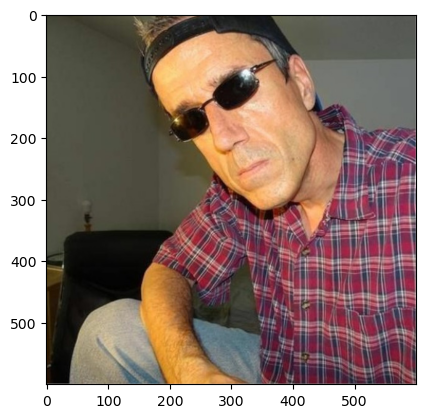

In [71]:
import cv2, numpy
import matplotlib.pyplot as plt 

__img__ = cv2.imread('img.jpg')

img = cv2.cvtColor(__img__, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img.shape

#### Requerimiento 2

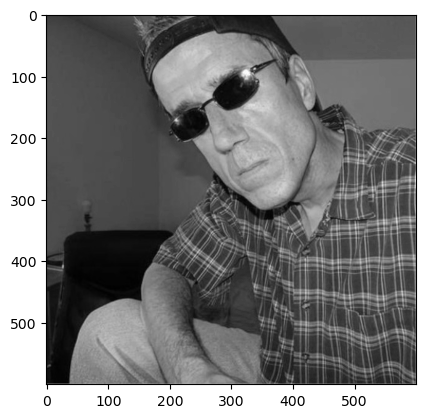

In [72]:
gris_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gris_img,cmap="gray")

#### Requerimiento 3

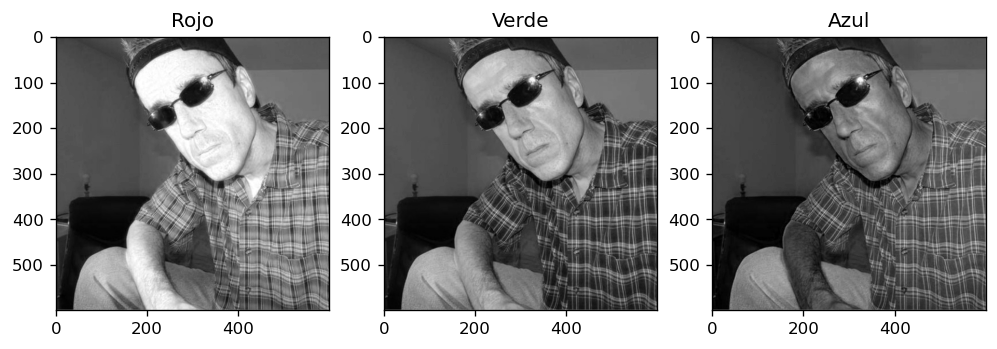

In [73]:

def mk_plots(x=10,y=15,nr=1,nc=3,dpi=120,axis="on"):
    fig, ax = plt.subplots(nrows=nr, ncols=nc, dpi=dpi)
    fig.set_size_inches(x,y)

    if nr != 1: [[x.axis(axis) for x in y] for y in ax]
    else: [x.axis(axis) for x in ax]
    
    return ax

ax = mk_plots()

#Dividir matriz de la imagen RGB
R_img, G_img, B_img = cv2.split(img)

RGB_dict = {
    "Rojo"  :R_img,
    "Verde" :G_img, 
    "Azul"  :B_img
}

for idx, _canal in enumerate(RGB_dict.keys()):

    #Mostrar cada canal en orden RGB en una figura
    ax[idx].imshow(RGB_dict[_canal],cmap="gray")
    ax[idx].set_title(_canal)

    #Guardar cada canal en un archivo
    cv2.imwrite(f'img_{_canal}.jpg',RGB_dict[_canal])

plt.show()

#### Requerimiento 4

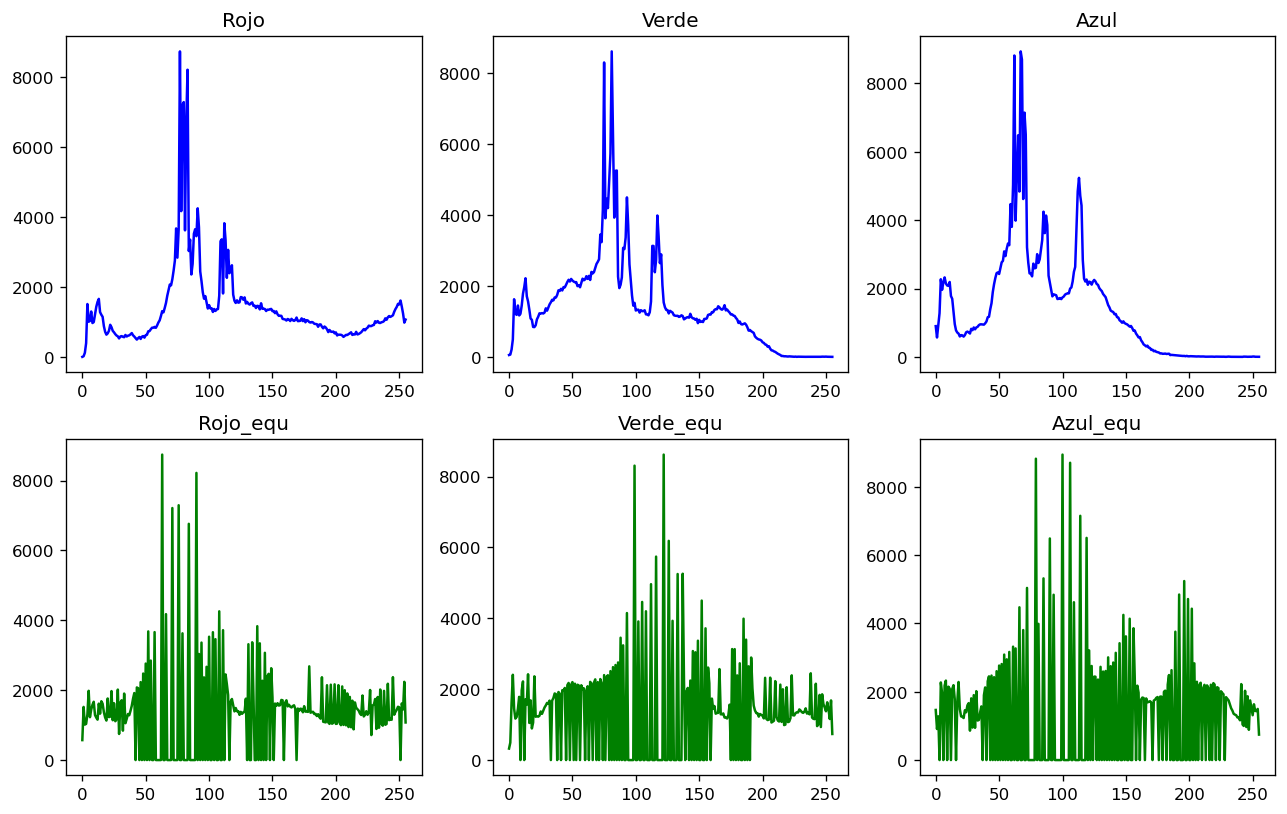

In [74]:
#Crear 2 columnas de graficos (nr = 2)
ax_antes, ax_despues = mk_plots(x=13,y=8,nr=2,dpi=120)

#Histogramas de imagenes originales
RGB_dict = {"Rojo":R_img, "Verde":G_img, "Azul":B_img}
for idx, _canal in enumerate(RGB_dict.keys()):
    ax_antes[idx].plot(cv2.calcHist([ RGB_dict[_canal] ],[0],None,[256],[0,256]), color='b')
    ax_antes[idx].set_title(_canal)

#ECUALIZACION
R_equ, G_equ, B_equ = [cv2.equalizeHist(R_img), cv2.equalizeHist(G_img), cv2.equalizeHist(B_img)]

#Histogramas de imagenes ecualizadas
equ_RGB_dict = {"Rojo_equ":R_equ, "Verde_equ":G_equ, "Azul_equ":B_equ}
for idx, _canal in enumerate(equ_RGB_dict.keys()):
    ax_despues[idx].plot( cv2.calcHist( [equ_RGB_dict[_canal]],[0],None,[256],[0,256]), color='g')
    ax_despues[idx].set_title(_canal)

plt.show()

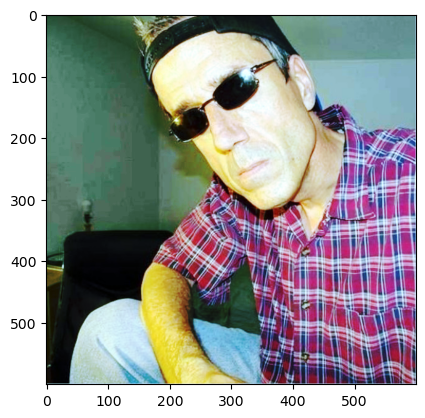

In [75]:
#Resultado Requerimiento 4:

equ_img = cv2.merge((R_equ,G_equ,B_equ))
plt.imshow(equ_img)

#### Requerimiento 5

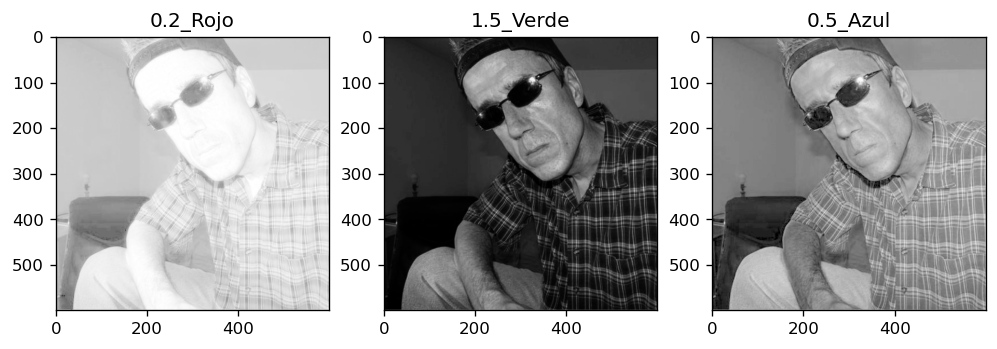

In [76]:
gamma_correction = lambda img, factor: numpy.uint8(cv2.pow(img/255.0, factor)*255)

ax = mk_plots()

#Dividir matriz de "Requerimiento 3" con funcion gamma respectiva para cada uno
R_gma, G_gma, B_gma = [gamma_correction(R_img, 0.2),gamma_correction(G_img, 1.5),gamma_correction(B_img, 0.5)]

Gamma_dict = {
    "0.2_Rojo"  :R_gma,
    "1.5_Verde" :G_gma, 
    "0.5_Azul"  :B_gma
}
for idx, _canal in enumerate(Gamma_dict.keys()):

    #Mostrar cada canal en orden RGB en una figura
    ax[idx].imshow( Gamma_dict[_canal], cmap="gray" )
    ax[idx].set_title(_canal)

    #Guardar cada canal en un archivo
    cv2.imwrite(f'img_gma_{_canal}.jpg',Gamma_dict[_canal])

plt.show()

#### Requerimiento 6

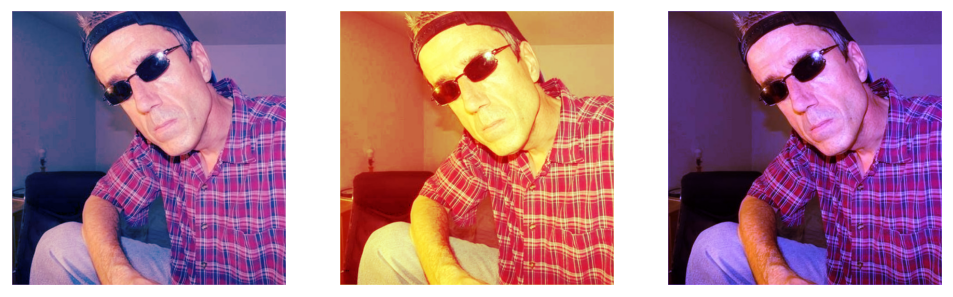

In [77]:
ax = mk_plots(axis="off")

img_1 = (R_equ,G_img,B_gma)
img_2 = (R_gma,G_equ,B_img)
img_3 = (R_img,G_gma,B_equ)

[ ax[idx].imshow(cv2.merge(foo)) for idx, foo in enumerate([img_1,img_2,img_3]) ]
plt.show()

#### <sub><sub>Imagen elegida de Terry Davis Q.E.D<sub><sub>